## Scientific Question: During 2009, how similar were the antigenic regions of the haemagglutinin (HA) proteins in the two Influenza A virus variants, H1N1 and H3N2, seeing as they are the two that most commonly circulate in humans?
Influenza is an RNA virus that can be divided into types A, B, C, or D, depending on the antigenicity of the components in their viral core. <b>Influenza A</b> accounts for a majority of influenza infections in humans. The two viral surface proteins on Influenza A: <b>Haemagglutinin (HA)</b> and neuraminidase (NA), are used to divide Influenza A into different subtypes. There are 16 HA subtypes and 9 NA subtypes, combined together to make up all the Influenza A subtypes. HA is responsible for binding the virus to the host cell and NA cleaves sialic acid molecules to free the virus and allow it to infect other host cells. The two Influenza A subtypes that are most commonly circulated in humans are <b>H1N1</b> and <b>H3N2</b> (CDC) (Cheng et al.).

## Scientific Hypothesis: If the haemagglutinin (HA) protein of Influenza A variants, H1N1 and H3N2, are clustered closer together hinting at relatedness, then they will have similar consensus sequences.
On UniProt, a database containing protein sequences, over 200 sequences come up when searching for 2009 H1N1 Influenza A HA proteins. The 25 longest proteins were selectected for H1N1. Only 5 came up for H3N2, and were all chosen. The chosen sequences were saved to two FASTA files, separated into H1N1 and H3N2 sequences. These sequences are to be used with multiple sequence alignment to see what the differences are between the HA protein sequence of the two viruses.<br><br>
Next, RCSB, a protein data bank (PDB) archive, was used to find the protein structure of the HA proteins of the viruses. Because the HA protein of the 2009 H3N2 variant could not be found, the 2005 one was downloaded instead. The data from this archive were downloaded as PDB files. The data will be used with homology modeling to compare the two structures.<br><br>
Finally, 3D protein measurements and sequence logos are going to be used to answer the scientific question and test the hypothesis. 3D protein measurements are used to analyze the differences between 3D structures of proteins. Sequence logos is used to analyze the similarity of the sequences between the two variants.
## Part 1: Load the packages
Packages loaded include the following:
<ul>
    <li>AlignIO: This python package is used to take files, read them, and produce a MultipleSeqAlignment object. The package deals with files containing sequence alignments represented as Alignment objects. Some common files AlignIO can read include: fasta, phylip, and stockholm. The sequences in a file must be of the same length to use this package. To learn more about AlignIO, see the documentation page here: https://biopython.org/docs/1.76/api/Bio.AlignIO.html</li>
    <li>FastaParser: This is a python package used to parse and write FASTA files. When parsing FASTA files, the data is extracted into FastaSequence objects. It can handle nucleotide and amino acid sequences. The ID, header, description, and sequence can be read using this package. To learn more about FastaParser, see the documentation page here: https://fastaparser.readthedocs.io/en/latest/</li>
    <li>MetaLogo: This is a python package used to make sequence logos. The tool can takes multiple sequences as input. Then, it does calculations and groups sequences togther, outputting an aligned sequence logo. Other graphics could also be made, like heat maps. To learn more about MetaLogo, see the GitHub page here: https://github.com/labomics/MetaLogo</li>
    <li>Modeller</li>
    <li>Numpy</li>
    <li>nglview</li>
    <li>pandas</li>
    <li>seq</li>
</ul>

In [ ]:
conda install -c kronopt fastaparser
conda install -c salilab modeller
conda install numpy biopython scipy
conda install -c bioconda logomaker

In [68]:
import fastaparser
from Bio import AlignIO
from Bio import Seq, SeqIO
import os
from modeller import *
from Bio.PDB import *
import numpy as np
import pandas as pd
import modeller
import nglview as nv
from MetaLogo import logo

## Part 2A: Load in the data and perform Bioinformatics Analyses (Multiple Sequence Alignment)
Fasta files are text files representing nucleotide sequences of amino acid sequences, with sequence names and descriptions preceding the sequences. Multiple sequence alignment is the alignment of many sequences. The fasta files were obtained from UniProt and there are two fasta files, each containing sequences for their respective Influenza variant.<br>
In the code below, fasta files are read into lists. Then, the files are used with multiple sequence alignment using AlignIO.

In [69]:
#loading in sequences from fasta files into lists
seqH1N1List=[]
with open("2009_h1n1.fasta") as h1n1_file:
    parser = fastaparser.Reader(h1n1_file)
    for seq in parser: #seq is a FastaSequence object
        #testing to make sure every sequence is in the list
        #print('ID:', seq.id) #print id of each sequence
        #print('Description:', seq.description) #print description of each sequence
        #print('Sequence:', seq.sequence_as_string())
        seqH1N1List.append(seq.sequence_as_string()) #store each sequence in fasta file into list
        #print()
print(seqH1N1List)

seqH3N2List=[]
with open("2009_h3n2.fasta") as h3n2_file:
    parser = fastaparser.Reader(h3n2_file)
    for seq in parser:
        seqH3N2List.append(seq.sequence_as_string())
        #print('Sequence:', seq.sequence_as_string()) #for testing purposes
        
        
#using AlignIO for multiple sequence alignment
#h1n1_file="2009_h1n1.fasta"
h1n1_alignment = AlignIO.read(open("2009_h1n1.fasta"), "fasta") #read in file, put in alignment variable
print("Multiple sequence alignment of h1n1")
print("Alignment length %i" % h1n1_alignment.get_alignment_length()) #print length of alignments
for record in h1n1_alignment: #for each record,print sequence and it's id
    print(record.seq + " ") #+ record.id)
    
#h1n1_file.close() #this does not work
#error for not closing 2009_h1n1.fasta file
    

input_file="2009_h3n2.fasta"
records = SeqIO.parse(input_file, 'fasta')
records = list(records) # make a copy, otherwise our generator
                        # is exhausted after calculating maxlen
maxlen = max(len(record.seq) for record in records)

# pad sequences so that they all have the same length
for record in records:
    if len(record.seq) != maxlen:
        sequence = str(record.seq).ljust(maxlen, '.')
        record.seq = Seq.Seq(sequence)
assert all(len(record.seq) == maxlen for record in records)

# write to temporary file and do alignment
output_file = '{}_padded.fasta'.format(os.path.splitext(input_file)[0])
with open(output_file, 'w') as f:
    SeqIO.write(records, f, 'fasta')
h3n2_alignment = AlignIO.read(output_file, "fasta")
print("Multiple sequence alignment of h3n2")
print("Alignment length %i" % h1n1_alignment.get_alignment_length()) #print length of alignments
for record in h3n2_alignment: #for each record,print sequence and it's id
    print(record.seq + " ") #+ record.id)

['MKAILVVLLYTFATANADTLCIGYHANNSTDTVDTVLEKNVTVTHSVNLLEDKHNGKLCKLRGVAPLHLGKCNIAGWILGNPECESLSTASSWSYIVETSSSDNGTCYPGDFIDYEELREQLSSVSSFERFEIFPKTSSWPNHDSNKGVTAACPHAGAKSFYKNLIWLVKKGNSYPKLSKSYINDKGKEVLVLWGIHHPSTSADQQSLYQNADAYVFVGSSRYSKKFKPEIAIRPKVRDQEGRMNYYWTLVEPGDKITFEATGNLVVPRYAFAMERNAGSGIIISDTPVHDCNTTCQTPKGAINTSLPFQNIHPITIGKCPKYVKSTKLRLATGLRNVPSIQSRGLFGAIAGFIEGGWTGMVDGWYGYHHQNEQGSGYAADLKSTQNAIDEITNKVNSVIEKMNTQFTAVGKEFNHLEKRIENLNKKVDDGFLDIWTYNAELLVLLENERTLDYHDSNVKNLYEKVRSQLKNNAKEIGNGCFEFYHKCDNTCMESVKNGTYDYPKYSEEAKLNREEIDGVKLESTRIYQILAIYSTVASSLVLVVSLGAISFWMCSNGSLQCRICI', 'MEAILVVLLYTFATANADTLCIGYHANNSTDTVDTVLEKNVTVTHSVNLLEDKHNGKLCKLRGVAPLHLGKCNIAGWILGNPECESLSTASSWSYIVETSSSDNGTCYPGDFIDYEELREQLSSVSSFERFEIFPKTSSWPNHDSNKGVTAACPHAGAKSFYKNLIWLVKKGNSYPKLSKSYINDKGKEVLVLWGIHHPSTSADQQSLYQNADAYVFVGSSRYSKKFKPEIAIRPKVRDQEGRMNYYWTLVEPGDKITFEATGNLVVPRYAFAMERNAGSGIIISDTPVHDCNTTCQTPKGAINTSLPFHNIHPITIGKCPKYVKSTKLRLATGLRNVPSIQSRGLFGAIAGFIEGGWTGMVDGWYGYHHQNEQGSGYAADLKSTQNAIDEITNKVNSVIEKMNTQFTAVGKEFNHLEKRIENLNKKV

C:\Users\sboun\AppData\Local\Temp/ipykernel_34624/1205204495.py:24: ResourceWarning: unclosed file <_io.TextIOWrapper name='2009_h1n1.fasta' mode='r' encoding='cp1252'>
  h1n1_alignment = AlignIO.read(open("2009_h1n1.fasta"), "fasta") #read in file, put in alignment variable


## Part 2B: Load in the data and perform Bioinformatics Analyses (Homology Modeling)
Pdb files contain information about proteins, including atoms in a protein and their 3D location in space. The pdb files were obtained from RCSB.<br>
In the code below, the 3d structure of the haemagglutinin protein in two influenza variants are shown using PDBParser and nglview.<br>
There were errors building the HA structure from H1N1 because the PDB file contains missing stretches in the protein from lack of density.
https://bioinformatics.stackexchange.com/questions/14101/extract-residue-sequence-from-pdb-file-in-biopython-but-open-to-recommendation

In [20]:
parser = PDBParser()
h1n1structure = parser.get_structure("3lzg", "3lzg.pdb") #get structure from pdb file
viewh1n1 = nv.show_biopython(h1n1structure) #use nglview to put 3d structure to output
print("Model of H1N1 haemagglutinin structure")
viewh1n1

h3n2structure = parser.get_structure("2yp7", "2yp7.pdb")
viewh3n2 = nv.show_biopython(h3n2structure)
print("Model of H3N2 haemagglutinin structure")
viewh3n2

C:\Users\sboun\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 47648.
  warnings.warn(
C:\Users\sboun\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 47704.
  warnings.warn(
C:\Users\sboun\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 47760.
  warnings.warn(
C:\Users\sboun\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 47844.
  warnings.warn(
C:\Users\sboun\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 47872.
  warnings.warn(
C:\Users\sboun\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain K is discontinuous at line 47956.
  warnings.warn(
C:\Users\s

Model of H1N1 haemagglutinin structure
Model of H3N2 haemagglutinin structure


C:\Users\sboun\anaconda3\lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8574.
  warnings.warn(


NGLWidget()

## Part 3A: 3D protein measurements
3D protein measurements are used to compare the structures of two different proteins. The modeller package structurally aligns the sequences from the two pdb files to assess the structural and sequence similarity of the two.

In [70]:
env = environ()
aln = alignment(env)
for(pdb, chain) in (('2yp7', 'A'),('3lzg','A')):
    m = model(env, file=pdb, model_segment=('FIRST:'+chain, 'LAST:'+chain))
    aln.append_model(m, atom_files=pdb, align_codes=pdb+chain)
aln.malign()
aln.malign3d()
aln.compare_structures()

#code to create phylogenetic tree, but not sure how to make a matrix file
#aln.id_table(matrix_file='example.mat')
#env.dendrogram(matrix_file='example.mat', cluster_cut=1.0)

environ____W> The class 'environ' is deprecated; use 'Environ' instead
alignment__W> The class 'alignment' is deprecated; use 'Alignment' instead
model______W> The class 'model' is deprecated; use 'Model' instead
model______W> The class 'model' is deprecated; use 'Model' instead

Multiple dynamic programming alignment (MALIGN):
  Residue-residue metric  : $(LIB)/as1.sim.mat
  ALIGN_BLOCK             :            1
  Gap introduction penalty:    -900.0000
  Gap extension penalty   :     -50.0000
  Length of alignment     :          498
# Sequence alignment of the structurally conserved regions
# [average distance and standard deviation are with respect
#  to the framework (i.e., average structure)]
#
#  N av ds st dv   2yp7A  3lzgA  
# ===============================
   1 1.696 0.000   A  11  D  11  
   2 1.320 0.000 * T  12  T  12  
   3 0.851 0.000 * L  13  L  13  
   4 0.988 0.000 * C  14  C  14  
   5 0.869 0.000   L  15  I  15  
   6 0.782 0.000 * G  16  G  16  
   7 0.638 0.000   

## Part 3B: Sequence logos
Sequence logo is a graphical representation of the sequence conservation of amino acids or nucleotides.
https://www.tije.co/post/seqlogo_from_multiple_sequence_alignment/

target_sequence:  ATACAGATACACATCACAGG
target_group:  Len20


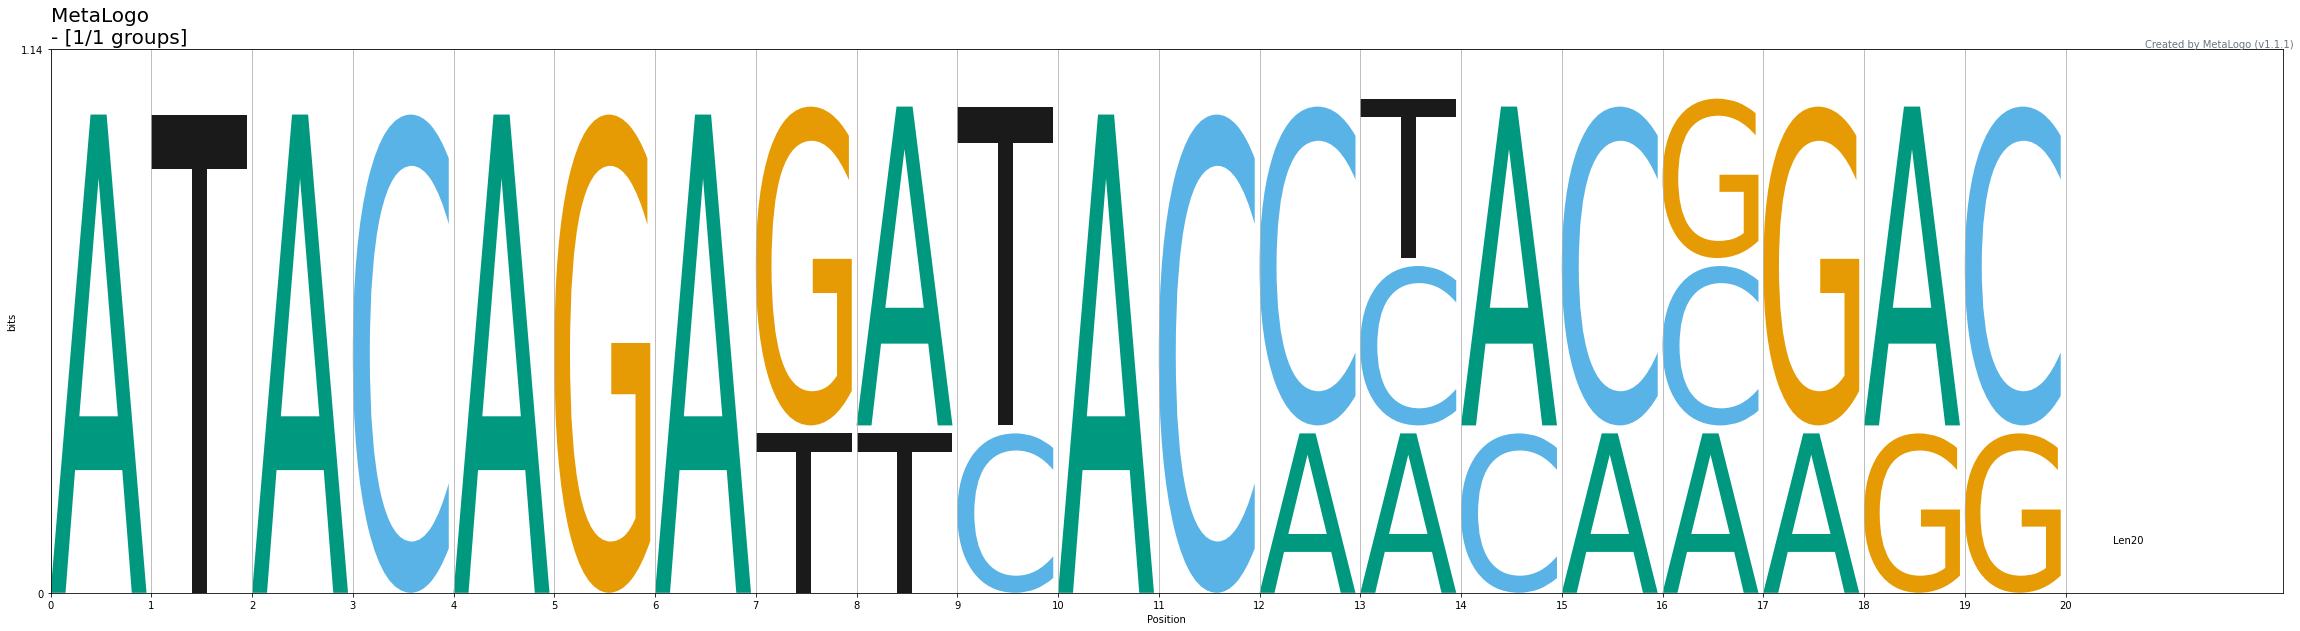

In [74]:
#sample code from another package, couldn't figure out how to format
#sequences = [['seq1','ATACAGATACACATCACAGG'],['seq2','ATACAGAGATACCAACAGAC'],['seq3','ATACAGAGTTACCCACGGAC']]
sequences = [['seq1','ATACAGATACACATCACAGG'],['seq2','ATACAGAGATACCAACAGAC'],['seq3','ATACAGAGTTACCCACGGAC']]
bin_args = {
    'clustalo_bin':'../MetaLogo/dependencies/clustalo',
    'fasttree_bin':'../MetaLogo/dependencies/FastTree',
    'fasttreemp_bin':'../MetaLogo/dependencies/FastTreeMP',
    }

lg = logo.LogoGroup(sequences,height_algorithm='probabilities',group_strategy='length', **bin_args)
lg.draw()


#sequence logo code for 'import seqlogo' but must have downgraded python version
if False: #done to comment out the code below
    def alnSiteCompositionDF(aln, characters="ACDEFGHIKLMNPQRSTVWY"):
      alnRows = aln.get_alignment_length()
      compDict = {char:[0]*alnRows for char in characters}
      for record in aln:
        header = record.id
        seq = record.seq
        for aaPos in range(len(seq)):
          aa = seq[aaPos]
          if aa in characters:
            compDict[aa][aaPos] += 1    
      return pd.DataFrame.from_dict(compDict)

    h1n1_alignmentSiteCompDF = alnSiteCompositionDF(h1n1_alignment)
    h1n1_alignmentSiteFreqDF = h1n1_alignmentSiteCompDF.div(h1n1_alignmentSiteCompDF.sum(axis=1), axis=0)
    h1n1_alignmentSiteFreqSeqLogo= seqlogo.Ppm(h1n1_alignmentSiteFreqDF,alphabet_type="AA")
    seqlogo.seqlogo(h1n1_alignmentSiteFreqSeqLogo, ic_scale = False, format = 'svg', size = 'large')

    h3n2_alignmentSiteCompDF = alnSiteCompositionDF(h3n2_alignment)
    h3n2_alignmentSiteFreqDF = h3n2_alignmentSiteCompDF.div(h3n2_alignmentSiteCompDF.sum(axis=1), axis=0)
    h3n2_alignmentSiteFreqSeqLogo= seqlogo.Ppm(h3n2_alignmentSiteFreqDF,alphabet_type="AA")
    seqlogo.seqlogo(h3n2_alignmentSiteFreqSeqLogo, ic_scale = False, format = 'svg', size = 'large')

## Part 4: Analysis of results